In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("casestudy (1).csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685927 entries, 0 to 685926
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      685927 non-null  int64  
 1   customer_email  685927 non-null  object 
 2   net_revenue     685927 non-null  float64
 3   year            685927 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 20.9+ MB


In [ ]:
data.head()

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


In [ ]:
data.describe()

,Unnamed: 0,net_revenue,year
count,685927.000000,685927.000000,685927.000000
mean,342963.000000,125.647755,2016.027252
std,198010.213384,71.854528,0.837203
min,0.000000,1.000000,2015.000000
25%,171481.500000,63.510000,2015.000000
50%,342963.000000,125.730000,2016.000000
75%,514444.500000,187.820000,2017.000000
max,685926.000000,250.000000,2017.000000


***Total Revenue for the current Year***


In [ ]:
data['year'].value_counts()

2017    249987
2015    231294
2016    204646
Name: year, dtype: int64

In [ ]:
#from the above data we can see that the current year is "2017"
data.groupby(['year'])[['net_revenue']].sum()

,net_revenue
year,
2015,29036749.19
2016,25730943.59
2017,31417495.03


From the above data, we can see that the total_revenue for current year (2017) is 31417495.03

***New Customer Revenue***

In [ ]:
#finding the count of customer emails
my_array = np.array(np.unique(data['customer_email'], return_counts=True)).T

In [ ]:
#converting the unique mails and counts to a data frame
df = pd.DataFrame(my_array, columns = ['Column_A','Column_B'])

In [ ]:
df.describe()

,Column_A,Column_B
count,604618,604618
unique,604618,3
top,hwzcqbgejq@gmail.com,1
freq,1,529471


In [ ]:
#dropping email with count more than 1
df = df.loc[df["Column_B"] == 1]

In [ ]:
#creating a new dataframe from existing dataframe with unique mails
newdf = data[data['customer_email'].isin(df['Column_A'])]
newdf.describe()

,Unnamed: 0,net_revenue,year
count,529471.000000,529471.000000,529471.000000
mean,363682.823040,125.691451,2016.108255
std,202893.586372,71.839520,0.861541
min,0.000000,1.000000,2015.000000
25%,187621.500000,63.570000,2015.000000
50%,378693.000000,125.810000,2016.000000
75%,543300.500000,187.910000,2017.000000
max,685926.000000,250.000000,2017.000000


In [ ]:
newdf.groupby(['year'])[['net_revenue']].sum()

,net_revenue
year,
2015,2.147600e+07
2016,1.639737e+07
2017,2.867661e+07


New Customer Revenue is 2.8677661e+07

***Existing Customer Growth.***

In [ ]:
#defining df with customer_email and their frequency counts
df = pd.DataFrame(my_array, columns = ['Column_A','Column_B'])

In [ ]:
df.describe()

,Column_A,Column_B
count,604618,604618
unique,604618,3
top,hwzcqbgejq@gmail.com,1
freq,1,529471


In [ ]:
#dropping email with count equal to 1
#this step makes sure that only existing customers are included in the calculation of reveneue
df = df.loc[df["Column_B"] != 1]

In [ ]:
df['Column_B'].value_counts()

2    68985
3     6162
Name: Column_B, dtype: int64

In [ ]:
#creating another dataframe with datas from year 2017
dfcurrent = data[data['year']==2017]

In [ ]:
#dropping the new customers from year 2017
dfcurrent = dfcurrent[dfcurrent['customer_email'].isin(df['Column_A'])]

In [ ]:
dfcurrent.describe()

,Unnamed: 0,net_revenue,year
count,21725.000000,21725.000000,21725.0
mean,538061.889298,126.162826,2017.0
std,59262.590555,72.385793,0.0
min,435947.000000,1.010000,2017.0
25%,486668.000000,63.100000,2017.0
50%,537422.000000,126.470000,2017.0
75%,589682.000000,189.010000,2017.0
max,640583.000000,249.980000,2017.0


In [ ]:
#finally collecting the exisiting customers from previous year
current = data[data['customer_email'].isin(dfcurrent['customer_email'])]

In [ ]:
current.describe()

,Unnamed: 0,net_revenue,year
count,49612.000000,49612.000000,49612.000000
mean,390759.078187,125.575056,2016.298254
std,161252.176579,72.047697,0.698996
min,16.000000,1.010000,2015.000000
25%,283963.750000,62.920000,2016.000000
50%,406202.500000,125.730000,2016.000000
75%,523010.750000,187.622500,2017.000000
max,640583.000000,249.990000,2017.000000


In [ ]:
current.groupby(['year'])[['net_revenue']].sum()

,net_revenue
year,
2015,868493.65
2016,2620648.65
2017,2740887.39


The existing customer revenue growth = 2740887.39-2620648.65 = 120238.74


***Revenue lost from attrition***

In [ ]:
#to find the revenue lost from attrition we have to see how many customers we lost in 2017
#converting the unique mails and counts to a data frame
df = pd.DataFrame(my_array, columns = ['Column_A','Column_B'])

In [ ]:
#dropping email with count more than 1
df = df.loc[df["Column_B"] == 1]

In [ ]:
#creating another dataframe with datas from year 2016
dfprev = data[data['year']==2016]

In [ ]:
#finally collecting the unique customers in year 2016
prev = dfprev[dfprev['customer_email'].isin(df['Column_A'])]

In [ ]:
prev['net_revenue'].sum()

16397370.16

In [ ]:
#creating another dataframe with datas from year 2015
dfold = data[data['year']==2015]

In [ ]:
#finally collecting the unique customers in year 2015
old = dfold[dfold['customer_email'].isin(df['Column_A'])]

In [ ]:
old['net_revenue'].sum()

21476000.699999996

So the total revenue lost from attrition will be the sum of revenue from  2015 and revenue from 2016, which is equal to 16397370.16+21476000 = 37,873,370

***Existing Customer Revenue Current Year***

While calculating the exisitng customer revenue growth, I have calculated the exisitng customer revenue current year which is 2740887.39

***Existing Customer Revenue Prior Year***

While calculating the exisitng customer revenue growth, I have calculated the exisitng customer revenue in year 2016 which is 2620648.65 and the customer revenue in year 2015 which is 868493.65

***Total Customers Current Year***

In [ ]:
#dataframe with datas from year 2017
dfcurrent = data[data['year']==2017]

In [ ]:
dfcurrent.describe()

,Unnamed: 0,net_revenue,year
count,249987.000000,249987.000000,249987.0
mean,560933.000000,125.676515,2017.0
std,72165.175209,71.924943,0.0
min,435940.000000,1.000000,2017.0
25%,498436.500000,63.390000,2017.0
50%,560933.000000,125.810000,2017.0
75%,623429.500000,187.970000,2017.0
max,685926.000000,250.000000,2017.0


From the above data we can see that the count is 249987 which is the number of customers for current year

***Total Customers Previous Year***

In [ ]:
#dataframe with datas from year 2016
dfprev = data[data['year']==2016]

In [ ]:
dfprev.describe()

,Unnamed: 0,net_revenue,year
count,204646.000000,204646.000000,204646.0
mean,333616.500000,125.733919,2016.0
std,59076.355932,71.838149,0.0
min,231294.000000,1.000000,2016.0
25%,282455.250000,63.722500,2016.0
50%,333616.500000,125.760000,2016.0
75%,384777.750000,187.890000,2016.0
max,435939.000000,250.000000,2016.0


From the above data we can see that the count is 204646 which is the number of customers for year 2016

In [ ]:
#dataframe with datas from year 2015
dfold = data[data['year']==2015]

In [ ]:
dfold.describe()

,Unnamed: 0,net_revenue,year
count,231294.000000,231294.000000,231294.0
mean,115646.500000,125.540434,2015.0
std,66768.970918,71.793027,0.0
min,0.000000,1.000000,2015.0
25%,57823.250000,63.430000,2015.0
50%,115646.500000,125.655000,2015.0
75%,173469.750000,187.560000,2015.0
max,231293.000000,250.000000,2015.0


From the above data we can see that the count is 231294 which is the number of customers for year 2015

***New Customers***

In second part of this case study we calculated the new customer revenue using newdf dataframe. So I am using that df to find the new customers

In [ ]:
#dataframe with newcustomers from year 2017
newcustomers = newdf[newdf['year']==2017]

In [ ]:
newcustomers['customer_email']

435940     mwrossuukz@gmail.com
435941    qvjfterwnk@gmail.com 
435942     vlyigtgfzs@gmail.com
435943     yfirychuhk@gmail.com
435944     fdkiioqtli@gmail.com
                  ...          
685922     qzqttwiftu@gmail.com
685923     pjodiifjop@gmail.com
685924     appaplmgko@gmail.com
685925     wvkpmwsgck@gmail.com
685926     aregboumbw@gmail.com
Name: customer_email, Length: 228262, dtype: object

The customer mails belong to the new customers, and the total new customers is 228262

***Lost Customers***

In [ ]:
customers2016 = data[data['year']==2016]

In [ ]:
customers2016.describe()

,Unnamed: 0,net_revenue,year
count,204646.000000,204646.000000,204646.0
mean,333616.500000,125.733919,2016.0
std,59076.355932,71.838149,0.0
min,231294.000000,1.000000,2016.0
25%,282455.250000,63.722500,2016.0
50%,333616.500000,125.760000,2016.0
75%,384777.750000,187.890000,2016.0
max,435939.000000,250.000000,2016.0


In [ ]:
customers2017 = data[data['year']==2017]

In [ ]:
#calculating the exisiting customers in 2017 from 2016
existcustomers = customers2016[customers2016['customer_email'].isin(customers2017['customer_email'])]

In [ ]:
existcustomers.describe()

,Unnamed: 0,net_revenue,year
count,20959.000000,20959.000000,20959.0
mean,333325.722840,125.036913,2016.0
std,59288.447226,71.551989,0.0
min,231301.000000,1.010000,2016.0
25%,281861.500000,63.315000,2016.0
50%,332788.000000,124.630000,2016.0
75%,384970.000000,185.910000,2016.0
max,435937.000000,249.970000,2016.0


We can see that out of 204646 customers from 2016, only 20959 exist in 2017. Therefore the lost customers = 183687

***PLOTS***

In [10]:
data = data.drop(columns=['Unnamed: 0'])

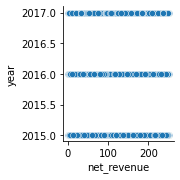

In [15]:
#pairplot showing distribution of revenue with year
pp = sns.pairplot(data=data,
                  y_vars=['year'],
                  x_vars=['net_revenue'])

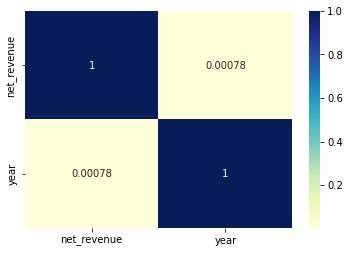

In [21]:
#correlation between revenue and year
a = sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

<function matplotlib.pyplot.show>

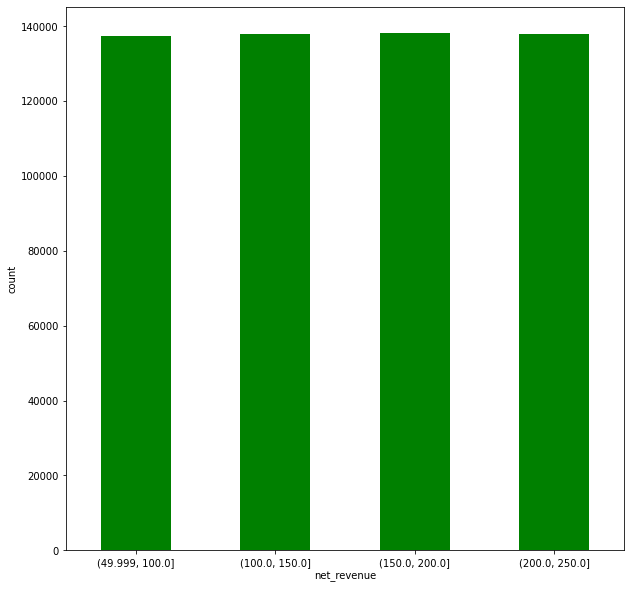

In [8]:
#distribution of revenue
#histplot
import seaborn as sns
bins=[50,100,150,200,250]
out=pd.cut(data.net_revenue,
          bins=bins,
          include_lowest=True)
ax=out.value_counts(sort=False).plot.bar(
rot=0,
color='g',   
    
figsize=(10,10))
plt.xlabel('net_revenue')
plt.ylabel('count')
plt.show

From the above plots we can observe that the distribution of revenue across year and across the min-max range is almost equal